# a 
The function estimates the optimal length for a VAR for the variables in df using the AIC, BIC, HQIC respectively and a maximum lag length of maxlags. Report and interpret the results.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

def calculate_ic(df, maxlags):
    # Convert all columns to float
    df = df.astype(float)
    
    ic_values = []

    for lag in maxlags:
        model = VAR(df)
        results = model.fit(lag)
        ic_values.append([lag, results.aic, results.bic, results.hqic])

    ic_df = pd.DataFrame(ic_values, columns=['Lag', 'AIC', 'BIC', 'HQIC'])
    return ic_df

# Load data
df = pd.read_csv('PJM.csv', parse_dates=['Date'], index_col='Date')
df.columns = ['Zonal_COMED_price', 'System_load_forecast', 'Zonal_COMED_load_forecast']
df = df.astype(float)

maxlags = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ic_df = calculate_ic(df, maxlags)
print(ic_df)

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\t

    Lag        AIC        BIC       HQIC
0     1  30.757071  30.759101  30.757706
1     2  28.132076  28.135629  28.133187
2     3  27.801695  27.806770  27.803281
3     4  27.779157  27.785754  27.781219
4     5  27.744723  27.752844  27.747261
5     6  27.704536  27.714180  27.707550
6     7  27.680788  27.691954  27.684278
7     8  27.656220  27.668909  27.660186
8     9  27.607674  27.621886  27.612116
9    10  27.569541  27.585276  27.574459
10   11  27.525311  27.542569  27.530705
11   12  27.485807  27.504588  27.491677
12   13  27.462122  27.482427  27.468469
13   14  27.265252  27.287080  27.272075
14   15  27.155159  27.178509  27.162457
15   16  27.108660  27.133535  27.116435
16   17  27.072016  27.098413  27.080267
17   18  27.060058  27.087979  27.068785
18   19  27.053989  27.083434  27.063193
19   20  27.049269  27.080236  27.058948


With the function calculate_ic we calculated the OPTIMAL LENGTH FOR A VAR FOR THE VARIABLES for the given dataset.From the results we can see that the IC results are decreasing as the number of lags keeps going up, which suggests that more historical data does help the model to better capture the dynamics between the data, thus improving the model's fit to the data. At the same time, it is noted that the BIC decreases more slowly compared to the AIC, which suggests that while a higher number of lags may reduce the value of the information criterion, it also increases the risk of model overfitting. At a lag number of 19, the HQIC stops decreasing and the IC value gradually stabilizes, suggesting that 19 lags may be a better number of lags.



# b 
and returns: • a N × N dataframe of Ftest statistics testing the H0 of no Granger-Causality for each pair of variables. Report and interpret the results.

In [2]:
from statsmodels.tsa.vector_ar.var_model import VARResults
import pandas as pd
def granger_causality_tests(res: VARResults, lag: int) -> pd.DataFrame:
    variables = res.model.endog_names
    f_stats = pd.DataFrame(index=variables, columns=variables)

    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            test_result = res.test_causality(var1, var2, kind='f', signif=0.05)
            f_stats.loc[var1, var2] = test_result.test_statistic

    return f_stats
model = VAR(df)
lag = ic_df['AIC'].idxmin()
results = model.fit(lag)

f_stats = granger_causality_tests(results, lag)
print(f_stats)

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                          Zonal_COMED_price System_load_forecast  \
Zonal_COMED_price              16710.417925           151.268283   
System_load_forecast              19.168456        100634.209447   
Zonal_COMED_load_forecast         12.695566          2555.598165   

                          Zonal_COMED_load_forecast  
Zonal_COMED_price                         29.201306  
System_load_forecast                     324.049866  
Zonal_COMED_load_forecast             148601.682234  


We ran the Granger Causality Test on the data using granger_causality_tests and obtained an N x N F-statistic. Where we focus on the part of each variable that interacts with the other variables, the F-statistic for Zonal_COMED_price vs. System_load_forecast is 151.268283, indicating that "System_load_forecast" significantly Granger Causality Tests "Zonal_COMED_price" to "Zonal_COMED_price". to "Zonal_COMED_price"; the F-statistic of "Zonal_COMED_load_forecast" to "System_load_forecast" is 151.268283 indicating that "System_load_forecast" is significantly Granger-induced. The F-statistic of "Zonal_COMED_load_forecast" is 324.049866, which indicates that "Zonal_COMED_load_forecast" significantly Granger causes "System_load_forecast The F-statistic of "System_load_forecast" to "Zonal_COMED_load_forecast" is 2555.598165, which indicates that "System_load_forecast" significantly Granger leads to "System_load_forecast". indicating that "System_load_forecast" significantly Granger causes "Zonal_COMED_load_forecast".
In summary, each pair of variables shows significant Granger causality. This means that, based on statistical criteria, the past value of each variable is predictive of the future value of the other variable.



# c
Which variables appear to have a short-lived response to the shock？

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


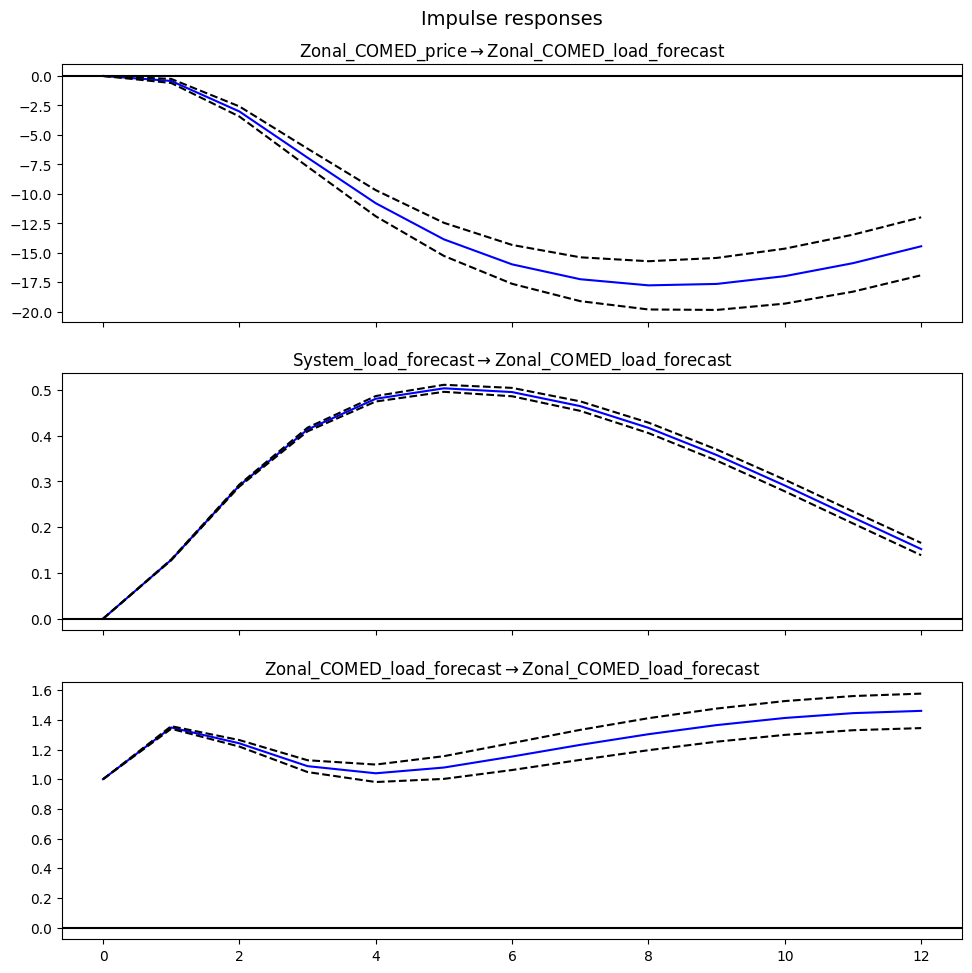

In [3]:
#c
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit a VAR(3) model
model = VAR(df)
results = model.fit(3)

# Compute impulse responses
irf = results.irf(12)

# Plot response of each variable to a shock in Zload
irf.plot(response='Zonal_COMED_load_forecast')
plt.show()

We plot the corresponding plots of each variable against Zload shocks over the next 12 cycles. We can see from the plots how each variable changes over time in response to the Zload shock.
The response to the "Zonal_COMED_load_forecast" shock starts off with a rapid decline and tends to a negative value instead of going back to zero within 12 periods. This means that the impact of the shock is long-lasting and remains significant at the end of the 12 periods of the simulation.
The second figure shows the response of "System_load_forecast" to the "Zonal_COMED_load_forecast" shock. In this figure, we see that the response curve starts off with a rapid increase, and then after about 5 periods the growth rate starts to decay towards 0, indicating a relatively short-lived response.
The response of Zonal_COMED_load_forecast to its own shock rises rapidly at first and then stabilizes at a high level, which also indicates a longer-lived response.
So the response of "System_load_forecast" to the "Zonal_COMED_load_forecast" shock is a relatively short-lived positive shock.

